In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# GPT Models: Architecture and Capabilities

GPT, on the other hand, focuses on the decoder portion of the original transformer architecture and is designed for tasks that require generating texts. This includes:

* Machine translation
* Text summarization
* Fiction writing
* Writing computer code
* And more.

We will discuss the GPT architecture in more detail in the remaining sections of this chapter and implement it from scratch in this book.

GPT models, primarily designed and trained to perform text completion tasks, also show remarkable versatility in their capabilities. These models are adept at executing both **zero-shot** and **few-shot** learning tasks.

* **Zero-shot learning** refers to the ability to generalize to completely unseen tasks without any prior specific examples.
* On the other hand, **few-shot learning** involves learning from a minimal number of examples the user provides as input, as shown in Figure 1.6.

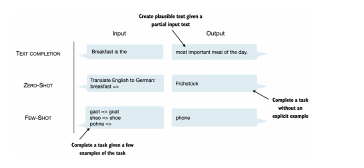

**Fig.6** In addition to text completion, GPT-like LLMs can solve various tasks based on their inputs without needing retraining, finetuning, or task-specific model architecture changes. Sometimes, it is helpful to provide examples of the target within the input, which is known as a few-shot setting. However, GPT-like LLMs are also capable of carrying out tasks without a specific example, which is called zero-shot setting.

## Transformers versus LLMs

Today's LLMs are based on the transformer architecture introduced in the previous section. Hence, transformers and LLMs are terms that are often used synonymously in the literature. However, note that not all transformers are...

# Beyond Transformers: LLM Architectures and Data Utilization

...LLMs, since transformers can also be used for computer vision. Also, not all LLMs are transformers, as there are large language models based on recurrent and convolutional architectures. The main motivation behind these alternative approaches is to improve the computational efficiency of LLMs. However, whether these alternative LLM architectures can compete with the capabilities of transformer-based LLMs and whether they are going to be adopted in practice remains to be seen. (Interested readers can find literature references describing these architectures in the Further Reading section at the end of this chapter.)

## 1.5 Utilizing large datasets

The large training datasets for popular GPT- and BERT-like models represent diverse and comprehensive text corpora encompassing billions of words, which include a vast array of topics and natural and computer languages. To provide a concrete example, Table 1.1 summarizes the dataset used for pretraining GPT-3, which served as the base model for the first version of ChatGPT.

**Table 1.1** The pretraining dataset of the popular GPT-3 LLM

| Dataset name | Dataset description    | Number of tokens | Proportion in training data |
| :----------- | :--------------------- | :--------------- | :-------------------------- |
| CommonCrawl  | Web crawl data         | 410 billion      | 60% (filtered)              |
| WebText2     | Web crawl data         | 19 billion       | 22%                         |
| Books1       | Internet-based book corpus | 12 billion       | 8%                          |
| Books2       | Internet-based book corpus | 55 billion       | 8%                          |
| Wikipedia    | High-quality text      | 3 billion        | 3%                          |

Table 1.1 reports the number of tokens, where a token is a unit of text that a...

In [1]:
import random

# --- Section 1: Data Preprocessing (Conceptual) ---
# Before feeding text into any LLM, it needs to be preprocessed,
# often involving tokenization (breaking text into words/subwords)
# and converting them into numerical IDs.

def simple_tokenize(text):
    """
    A very basic conceptual tokenizer.
    In reality, this involves vocabulary lookups,
    special tokens (CLS, SEP, PAD), etc.
    """
    return text.lower().split()

def text_to_ids(tokens, vocab_map):
    """
    Converts tokens to conceptual numerical IDs.
    """
    # Use .get() with a default for unknown words
    return [vocab_map.get(token, vocab_map.get('[UNK]', 0)) for token in tokens]

# --- Example Usage for Data Preprocessing ---
print("--- Section 1: Data Preprocessing (Conceptual) ---")
sample_text = "This is an example sentence about Transformers"
# A conceptual vocabulary map
concept_vocab = {
    'this': 1, 'is': 2, 'an': 3, 'example': 4, 'sentence': 5,
    'about': 6, 'transformers': 7, '[UNK]': 0, '[CLS]': 8, '[SEP]': 9, '[MASK]': 10
}

tokens = simple_tokenize(sample_text)
token_ids = text_to_ids(tokens, concept_vocab)

print(f"Original Text: '{sample_text}'")
print(f"Conceptual Tokens: {tokens}")
print(f"Conceptual Token IDs: {token_ids}")
print("-" * 50 + "\n")


# --- Section 2: Masked Word Prediction (Conceptual BERT-like Task) ---
# BERT's strength lies in predicting masked words in a sentence,
# understanding context from both left and right.

def conceptual_masked_prediction(sentence_tokens, vocab_map, mask_token='[MASK]'):
    """
    A conceptual function illustrating masked word prediction.
    It "predicts" a masked word based on a predefined simple rule,
    not actual model inference.
    """
    if mask_token not in sentence_tokens:
        return "No mask token found."

    masked_indices = [i for i, token in enumerate(sentence_tokens) if token == mask_token]
    
    predictions = []
    for masked_index in masked_indices:
        # Simulate a "prediction" based on simple context
        # This is *not* how a real BERT model predicts; it uses complex neural nets.
        predicted_word = None
        if masked_index > 0 and sentence_tokens[masked_index - 1] == 'an':
            predicted_word = "example"
        elif masked_index < len(sentence_tokens) - 1 and sentence_tokens[masked_index + 1] == 'is':
            predicted_word = "this"
        else:
            # A real model would output probabilities over the entire vocabulary
            possible_words = [k for k, v in vocab_map.items() if k not in ['[UNK]', '[CLS]', '[SEP]', '[MASK]']]
            if possible_words:
                predicted_word = random.choice(possible_words) # Random guess for generic case
            else:
                predicted_word = "[UNKNOWN_PREDICTION]" # Fallback if vocab is empty

        predictions.append(predicted_word)
    
    return predictions[0] if len(predictions) == 1 else predictions # Return single or list of predictions

# --- Example Usage for Masked Word Prediction ---
print("--- Section 2: Masked Word Prediction (Conceptual BERT-like Task) ---")
sentence1_tokens = ['this', 'is', 'an', '[MASK]', 'sentence']
sentence2_tokens = ['[MASK]', 'is', 'an', 'example', 'sentence']
sentence3_tokens = ['hello', 'world', '[MASK]']

print(f"Sentence: {sentence1_tokens} -> Predicted Mask: '{conceptual_masked_prediction(sentence1_tokens, concept_vocab)}'")
print(f"Sentence: {sentence2_tokens} -> Predicted Mask: '{conceptual_masked_prediction(sentence2_tokens, concept_vocab)}'")
print(f"Sentence: {sentence3_tokens} -> Predicted Mask: '{conceptual_masked_prediction(sentence3_tokens, concept_vocab)}'")
print("-" * 50 + "\n")


# --- Section 3: Text Generation (Conceptual GPT-like Task) ---
# GPT models excel at generating coherent text, word by word, given a starting prompt.

def conceptual_text_generation(prompt_tokens, max_length=10):
    """
    A conceptual function illustrating text generation.
    It "generates" words based on very simple, hardcoded sequences,
    not actual model inference.
    """
    generated_text_tokens = list(prompt_tokens)
    
    # Simulate generation based on the last token
    # A real GPT model uses complex attention and probability distributions.
    generation_rules = {
        'hello': ['world', 'how', 'are', 'you'],
        'the': ['cat', 'dog', 'sun'],
        'an': ['apple', 'orange', 'idea'],
        'this': ['is', 'a', 'very'],
        'is': ['a', 'good', 'day'],
        'world': ['!', 'today', 'is', 'a'], # Added for continuity
        'you': ['?', 'doing', 'well'], # Added for continuity
        'day': ['.', 'is', 'beautiful'] # Added for continuity
    }

    for _ in range(max_length - len(prompt_tokens)):
        if not generated_text_tokens: # Handle empty prompt case
            break
        last_token = generated_text_tokens[-1]
        next_possible_words = generation_rules.get(last_token.lower(), ['[GEN_UNK]']) # Fallback for unknown
        
        next_word = random.choice(next_possible_words)
        generated_text_tokens.append(next_word)
        
        # Stop if a "period" or end-like word is generated (conceptual)
        if next_word in ['.', '?', '!']:
            break

    return ' '.join(generated_text_tokens)

# --- Example Usage for Text Generation ---
print("--- Section 3: Text Generation (Conceptual GPT-like Task) ---")
prompt1_tokens = ['hello']
prompt2_tokens = ['this', 'is']
prompt3_tokens = ['the']

print(f"Prompt: '{' '.join(prompt1_tokens)}' -> Generated: '{conceptual_text_generation(prompt1_tokens, max_length=5)}'")
print(f"Prompt: '{' '.join(prompt2_tokens)}' -> Generated: '{conceptual_text_generation(prompt2_tokens, max_length=7)}'")
print(f"Prompt: '{' '.join(prompt3_tokens)}' -> Generated: '{conceptual_text_generation(prompt3_tokens, max_length=6)}'")
print("-" * 50 + "\n")


# --- Section 4: Zero-Shot Learning (Conceptual) ---
# Zero-shot learning means the model can perform a task it hasn't been explicitly trained on,
# based on its general understanding. Conceptually, this is like giving an instruction
# and getting a relevant response without examples.

def conceptual_zero_shot_translation(text, target_language):
    """
    A conceptual function for zero-shot translation.
    In a real LLM, this would involve complex language understanding.
    Here, it's a very basic rule-based simulation.
    """
    text_lower = text.lower()
    if "hello world" in text_lower and target_language.lower() == "spanish":
        return "Hola mundo"
    elif "good morning" in text_lower and target_language.lower() == "french":
        return "Bonjour"
    elif "how are you" in text_lower and target_language.lower() == "german":
        return "Wie geht es Ihnen?"
    else:
        return f"Conceptual translation for '{text}' to {target_language} is not available."

def conceptual_zero_shot_summarization(text):
    """
    A conceptual function for zero-shot summarization.
    It simply takes the first sentence as a "summary".
    A real LLM would extract key information and condense it.
    """
    sentences = text.split('.')
    if sentences and sentences[0].strip():
        return sentences[0].strip() + "."
    return "No text to summarize."

# --- Example Usage for Zero-Shot Learning ---
print("--- Section 4: Zero-Shot Learning (Conceptual) ---")
print(f"Translate 'Hello world' to Spanish: '{conceptual_zero_shot_translation('Hello world', 'Spanish')}'")
print(f"Translate 'Good morning' to French: '{conceptual_zero_shot_translation('Good morning', 'French')}'")
print(f"Translate 'How are you?' to German: '{conceptual_zero_shot_translation('How are you?', 'German')}'")
long_text = "The quick brown fox jumps over the lazy dog. This is a common phrase used for testing typewriters and computer fonts. It contains all letters of the alphabet."
print(f"Summarize '{long_text}' : '{conceptual_zero_shot_summarization(long_text)}'")
print("-" * 50 + "\n")


# --- Section 5: Few-Shot Learning (Conceptual) ---
# Few-shot learning involves providing a few examples within the input to guide the model
# on a new task. The model then applies the learned pattern to a new query.

def conceptual_few_shot_task(prompt_with_examples, new_query):
    """
    A conceptual function for few-shot learning.
    It simulates pattern recognition based on simple example parsing.
    A real LLM would learn complex relationships from the examples.

    Example prompt_with_examples format:
    "Translate: Apple -> Manzana\nTranslate: House -> Casa"
    """
    examples = [line.strip() for line in prompt_with_examples.strip().split('\n') if line.strip()]
    
    # Try to infer the task from the examples
    task_type = "unknown"
    if examples and "Translate:" in examples[0]:
        task_type = "translation"
    elif examples and "Sentiment:" in examples[0]:
        task_type = "sentiment"

    if task_type == "translation":
        # Simulate simple lookup based on examples
        for ex in examples:
            if "Translate:" in ex and "->" in ex:
                parts = ex.replace("Translate:", "").split('->')
                if len(parts) == 2 and new_query.strip().lower() == parts[0].strip().lower():
                    return parts[1].strip()
        return f"Conceptual translation for '{new_query}' not found in examples."
    elif task_type == "sentiment":
        # Simulate simple sentiment analysis (very basic) based on keywords in examples
        for ex in examples:
            if "Sentiment:" in ex and "->" in ex:
                parts = ex.replace("Sentiment:", "").split('->')
                if len(parts) == 2:
                    input_text_example = parts[0].strip().lower()
                    sentiment_label_example = parts[1].strip().lower()
                    
                    if sentiment_label_example == "positive" and "love" in new_query.lower() or "great" in new_query.lower():
                        return "Positive"
                    elif sentiment_label_example == "negative" and "terrible" in new_query.lower() or "bad" in new_query.lower():
                        return "Negative"
        return "Neutral" # Default for unknown sentiment or no match
    else:
        return "Could not infer task from examples."

# --- Example Usage for Few-Shot Learning ---
print("--- Section 5: Few-Shot Learning (Conceptual) ---")

translation_examples = """
Translate: Cat -> Gato
Translate: Dog -> Perro
"""
print(f"Few-shot translation for 'Cat': '{conceptual_few_shot_task(translation_examples, 'Cat')}'")
print(f"Few-shot translation for 'Bird': '{conceptual_few_shot_task(translation_examples, 'Bird')}'") # Not in examples

sentiment_examples = """
Sentiment: I love this product. -> Positive
Sentiment: This movie was terrible. -> Negative
"""
print(f"Few-shot sentiment for 'I am so happy today!': '{conceptual_few_shot_task(sentiment_examples, 'I am so happy today!')}'")
print(f"Few-shot sentiment for 'Feeling really sad.': '{conceptual_few_shot_task(sentiment_examples, 'Feeling really sad.')}'")
print("-" * 50 + "\n")



--- Section 1: Data Preprocessing (Conceptual) ---
Original Text: 'This is an example sentence about Transformers'
Conceptual Tokens: ['this', 'is', 'an', 'example', 'sentence', 'about', 'transformers']
Conceptual Token IDs: [1, 2, 3, 4, 5, 6, 7]
--------------------------------------------------

--- Section 2: Masked Word Prediction (Conceptual BERT-like Task) ---
Sentence: ['this', 'is', 'an', '[MASK]', 'sentence'] -> Predicted Mask: 'example'
Sentence: ['[MASK]', 'is', 'an', 'example', 'sentence'] -> Predicted Mask: 'this'
Sentence: ['hello', 'world', '[MASK]'] -> Predicted Mask: 'an'
--------------------------------------------------

--- Section 3: Text Generation (Conceptual GPT-like Task) ---
Prompt: 'hello' -> Generated: 'hello are [GEN_UNK] [GEN_UNK] [GEN_UNK]'
Prompt: 'this is' -> Generated: 'this is day .'
Prompt: 'the' -> Generated: 'the sun [GEN_UNK] [GEN_UNK] [GEN_UNK] [GEN_UNK]'
--------------------------------------------------

--- Section 4: Zero-Shot Learning (Conce

# Utilizing Large Datasets (Continued)

...model reads, and the number of tokens in a dataset is roughly equivalent to the number of words and punctuation characters in the text. We will cover **tokenization**, the process of converting text into tokens, in more detail in the next chapter. The main takeaway is that the scale and diversity of this training dataset allows these models to perform well on diverse tasks including language syntax, semantics, and context, and even some requiring general knowledge.

## GPT-3 dataset details

In Table 1.1, it's important to note that from each dataset, only a fraction of the data (amounting to a total of **300 billion tokens**) was used in the training process. This sampling approach means that the training didn't encompass every single piece of data available in each dataset. Instead, a selected subset of 300 billion tokens, drawn from all datasets combined, was utilized. Also, while some datasets were not entirely covered in this subset, others might have been included multiple times to reach the total count of 300 billion tokens. The column indicating proportions in the table, when summed up without considering rounding errors, accounts for 100% of this sampled data.

For context, consider the size of the CommonCrawl dataset, which alone consists of 410 billion tokens and requires about 570 GB of storage. In comparison, later iterations of models like GPT-3, such as Meta's LLaMA, have expanded their training scope to include additional data sources like Arxiv research papers (92 GB) and StackExchange's code-related Q&As (78 GB).

The Wikipedia corpus consists of English-language Wikipedia. While the authors of the GPT-3 paper didn't further specify the details, Books1 is likely a sample from Project Gutenberg (https://www.gutenberg.org/), and Books2 is likely from Libgen (https://en.wikipedia.org/wiki/Library_Genesis). CommonCrawl is a filtered subset of the CommonCrawl database (https://commoncrawl.org/), and WebText2 is the text of web pages from all outbound Reddit links from posts with 3+ upvotes. The authors of the GPT-3 paper did not share the training dataset but a comparable dataset that is publicly available is The Pile...

# Utilizing Large Datasets (Continued)

(https://pile.eleuther.ai/). However, the collection may contain copyrighted works, and the exact usage terms may depend on the intended use case and country. For more information, see the HackerNews discussion at https://news.ycombinator.com/item?id=25607809.

The pretrained nature of these models makes them incredibly versatile for further finetuning on downstream tasks, which is why they are also known as **base** or **foundation models**.

Pretraining LLMs requires access to significant resources and is very expensive. For example, the GPT-3 pretraining cost is estimated to be $$4.6 \text{ million in terms of cloud computing credits}^2$$. The good news is that many pretrained LLMs, available as open-source models, can be used as general purpose tools to write, extract, and edit texts that were not part of the training data. Also, LLMs can be finetuned on specific tasks with relatively smaller datasets, reducing the computational resources needed and improving performance on the specific task.

In this book, we will implement the code for pretraining and use it to pretrain an LLM for educational purposes. All computations will be executable on consumer hardware. After implementing the pretraining code, we will learn how to reuse openly available model weights and load them into the architecture we will implement, allowing us to skip the expensive pretraining stage when we finetune LLMs later in this book.

In [2]:
# --- Conceptual Representation of LLM Training Data and Processes ---

import random

# 1. Representing the GPT-3 Pretraining Dataset (from Table 1.1)
# This uses Python dictionaries and lists to structure the reported data.
print("--- 1. Conceptual Representation of GPT-3 Pretraining Dataset ---")

gpt3_pretraining_data = [
    {"name": "CommonCrawl", "description": "Web crawl data", "tokens_billion": 410, "proportion": "60% (filtered)"},
    {"name": "WebText2", "description": "Web crawl data", "tokens_billion": 19, "proportion": "22%"},
    {"name": "Books1", "description": "Internet-based book corpus", "tokens_billion": 12, "proportion": "8%"},
    {"name": "Books2", "description": "Internet-based book corpus", "tokens_billion": 55, "proportion": "8%"},
    {"name": "Wikipedia", "description": "High-quality text", "tokens_billion": 3, "proportion": "3%"}
]

total_sampled_tokens_billion = 300 # As stated in the text
estimated_gpt3_cost = 4.6e6 # $4.6 million

print("GPT-3 Pretraining Dataset Summary:")
for dataset in gpt3_pretraining_data:
    print(f"  - {dataset['name']}: {dataset['tokens_billion']} billion tokens, {dataset['proportion']}")

print(f"\nTotal sampled tokens for pretraining: {total_sampled_tokens_billion} billion tokens.")
print(f"Estimated GPT-3 pretraining cost: ${estimated_gpt3_cost:,.0f} (conceptual value from text).")
print("\n" + "="*70 + "\n")


# 2. Conceptual Placeholder for Pretraining an LLM
# This function simulates the *idea* of pretraining without any actual deep learning logic.
# In reality, this involves massive compute, neural networks, and optimization.

def conceptual_pretrain_llm(dataset_info, total_epochs=1):
    """
    A highly abstract conceptual function to represent LLM pretraining.
    Does not perform actual training.
    """
    print("--- 2. Conceptual LLM Pretraining Process ---")
    print("Initiating conceptual pretraining of an LLM...")
    print(f"Using a diverse dataset (conceptually derived from: {', '.join([d['name'] for d in dataset_info])})")
    print(f"  - Training on billions of tokens (conceptual total: {total_sampled_tokens_billion}B tokens)")
    print(f"  - This process is extremely resource-intensive and expensive (conceptual cost: ${estimated_gpt3_cost:,.0f})")
    
    for epoch in range(1, total_epochs + 1):
        print(f"  - Conceptual Epoch {epoch}/{total_epochs}: Simulating learning of language patterns...")
        # Simulate some very basic "learning" feedback
        if random.random() < 0.5:
            print("    * Conceptual: Model is improving its understanding of syntax.")
        else:
            print("    * Conceptual: Model is improving its ability to predict next words.")
        
    print("Conceptual pretraining complete. A 'base/foundation model' is conceptually ready.")
    print("This base model would ideally be capable of text completion and zero-shot tasks.")
    print("Note: This is a placeholder; no actual neural network training is happening.")
    print("\n" + "="*70 + "\n")

# --- Example Usage for Conceptual Pretraining ---
conceptual_pretrain_llm(gpt3_pretraining_data, total_epochs=2)


# 3. Conceptual Placeholder for Finetuning an LLM
# This function simulates the *idea* of finetuning without any actual deep learning logic.
# In reality, this involves smaller, task-specific datasets and adapting the pretrained model.

def conceptual_finetune_llm(base_model_name, finetuning_task, finetuning_dataset_size="smaller"):
    """
    A highly abstract conceptual function to represent LLM finetuning.
    Does not perform actual training.
    """
    print("--- 3. Conceptual LLM Finetuning Process ---")
    print(f"Initiating conceptual finetuning of base model '{base_model_name}' for '{finetuning_task}' task...")
    print(f"  - Using a {finetuning_dataset_size} labeled dataset specific to the task.")
    print("  - This process is less resource-intensive than pretraining.")
    
    # Simulate some very basic "finetuning" feedback
    if finetuning_task == "sentiment analysis":
        print("    * Conceptual: Model is adapting to recognize positive/negative sentiment.")
    elif finetuning_task == "medical Q&A":
        print("    * Conceptual: Model is specializing in medical knowledge retrieval.")
    elif finetuning_task == "code generation":
        print("    * Conceptual: Model is improving its ability to generate specific programming constructs.")
    else:
        print("    * Conceptual: Model is adapting to the specific patterns of the finetuning task.")
        
    print(f"Conceptual finetuning for '{finetuning_task}' complete. Model is now specialized.")
    print("Note: This is a placeholder; no actual neural network training is happening.")
    print("\n" + "="*70 + "\n")

# --- Example Usage for Conceptual Finetuning ---
conceptual_finetune_llm("GPT-3 Base Model", "sentiment analysis")
conceptual_finetune_llm("Meta's LLaMA", "medical Q&A")

print("--- End of Conceptual LLM Code ---")
print("This code demonstrates the conceptual flow and data representation,")
print("but actual LLM implementation requires specialized deep learning libraries.")

--- 1. Conceptual Representation of GPT-3 Pretraining Dataset ---
GPT-3 Pretraining Dataset Summary:
  - CommonCrawl: 410 billion tokens, 60% (filtered)
  - WebText2: 19 billion tokens, 22%
  - Books1: 12 billion tokens, 8%
  - Books2: 55 billion tokens, 8%
  - Wikipedia: 3 billion tokens, 3%

Total sampled tokens for pretraining: 300 billion tokens.
Estimated GPT-3 pretraining cost: $4,600,000 (conceptual value from text).


--- 2. Conceptual LLM Pretraining Process ---
Initiating conceptual pretraining of an LLM...
Using a diverse dataset (conceptually derived from: CommonCrawl, WebText2, Books1, Books2, Wikipedia)
  - Training on billions of tokens (conceptual total: 300B tokens)
  - This process is extremely resource-intensive and expensive (conceptual cost: $4,600,000)
  - Conceptual Epoch 1/2: Simulating learning of language patterns...
    * Conceptual: Model is improving its understanding of syntax.
  - Conceptual Epoch 2/2: Simulating learning of language patterns...
    * Con

# 1.6 A closer look at the GPT architecture

Previously in this chapter, we mentioned the terms GPT-like models, GPT-3, and ChatGPT. Let's now take a closer look at the general GPT architecture. First, GPT stands for **Generative Pretrained Transformer** and was originally introduced in the following paper: *Improving Language Understanding by Generative Pre-Training* (2018) by Radford et al. from OpenAI, http://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf

GPT-3 is a scaled-up version of this model that has more parameters and was trained on a larger dataset. And the original model offered in ChatGPT was created by finetuning GPT-3 on a large instruction dataset using a method from OpenAI's InstructGPT paper, which we will cover in more detail in Chapter 7, *Finetuning with Human Feedback To Follow Instructions*.

As we have seen earlier in Figure 1.6, these models are competent text completion models and can carry out other tasks such as spelling correction, classification, or language translation. This is actually very remarkable given that GPT models are pretrained on a relatively simple **next-word prediction task**, as illustrated in Figure 1.7.
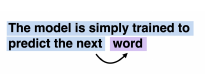

**Fig.7** In the next-word pretraining task for GPT models, the system learns to predict the upcoming word in a sentence by looking at the words that have come before it. This approach helps the model understand how words and phrases typically fit together in language, forming a foundation that can be applied to various other tasks.

The next-word prediction task is a form of **self-supervised learning**, which is a form of self-labeling. This means that we don't need to collect labels for the training data explicitly but can leverage the structure of the data itself: we can use the next word in a sentence or document as the label that the model is supposed to predict. Since this next-word prediction task allows us to create labels "on the fly," it is possible to leverage massive unlabeled text datasets to train LLMs as previously discussed in Section 1.5, *Utilizing large datasets*.

Compared to the original transformer architecture we covered in Section 1.4, *Using LLMs for different tasks*, the general GPT architecture is relatively simple. Essentially, it's just the decoder part without the encoder as illustrated in Figure 1.8. Since decoder-style models like GPT generate text by predicting text one word at a time, they are considered a type of **autoregressive model**. Autoregressive models incorporate their previous outputs as inputs for future predictions. Consequently, in GPT, each new word is chosen based on the sequence that precedes it, which improves coherence of the resulting text.

# GPT Architecture: Scale and Emergent Behaviors

Architectures such as GPT-3 are also significantly larger than the original transformer model. For instance, the original transformer repeated the encoder and decoder blocks six times. GPT-3 has $$96 \text{ transformer layers}$$ and $$175 \text{ billion parameters}$$ in total.

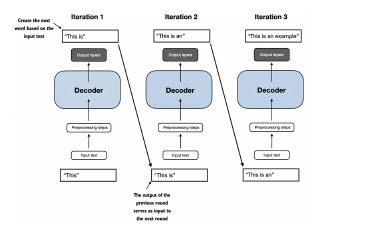

**Fig.8** The GPT architecture employs only the decoder portion of the original transformer. It is designed for unidirectional, left-to-right processing, making it well-suited for text generation and next-word prediction tasks to generate text in iterative fashion one word at a time.

GPT-3 was introduced in 2020, which, by the standards of deep learning and large language model (LLM) development, is considered a long time ago. However, more recent architectures, such as Meta's Llama models, are still based on the same underlying concepts, introducing only minor modifications. Hence, understanding GPT remains as relevant as ever, and this book focuses on implementing the prominent architecture behind GPT while providing pointers to specific tweaks employed by alternative LLMs.

Lastly, it's interesting to note that although the original transformer model was explicitly designed for language translation, GPT models—despite their larger yet simpler architecture aimed at next-word prediction—are also capable of performing translation tasks. This capability was initially unexpected to researchers, as it emerged from a model primarily trained on a next-word prediction task, which is a task that did not specifically target translation.

The ability to perform tasks that the model wasn't explicitly trained to perform is called an "**emergent behavior**." This capability isn't explicitly taught during training but emerges as a natural consequence of the model's exposure to vast quantities of multilingual data in diverse contexts. The fact that GPT models can "learn" the translation patterns between languages and perform translation tasks even though they weren't specifically trained for it demonstrates the benefits and capabilities of these large-scale, generative language models. We can perform diverse tasks without using diverse models for each.

In [3]:
### Conceptual Python Code for GPT Architecture and Emergent Behaviors

### The previous text detailed the GPT architecture's decoder-only nature, its autoregressive text generation, and the concept of emergent behaviors. Here are some highly simplified Python concepts to illustrate these ideas.

### 1. Conceptual GPT Architecture (High-Level Representation)

### We can represent the scale and the core idea of a decoder-only model conceptually.

class ConceptualGPTLayer:
    def __init__(self, layer_id):
        self.layer_id = layer_id
        # In a real model, this would contain attention weights, feed-forward network parameters, etc.
        # For conceptual purposes, we just acknowledge its existence.
        print(f"  ConceptualGPTLayer {self.layer_id} initialized.")

    def process_token_sequence(self, input_sequence):
        """
        Conceptually processes a sequence of tokens in a unidirectional manner.
        Does not perform actual computation.
        """
        # In a real model, this involves self-attention, masking, etc.
        return f"Processed_output_from_layer_{self.layer_id}_for_{input_sequence}"

class ConceptualGPTModel:
    def __init__(self, num_layers, total_parameters_billion=0):
        self.num_layers = num_layers
        self.total_parameters_billion = total_parameters_billion
        self.layers = [ConceptualGPTLayer(i + 1) for i in range(num_layers)]
        print(f"\nConceptual GPT Model initialized with {num_layers} layers.")
        if total_parameters_billion > 0:
            print(f"  (Conceptually representing {total_parameters_billion} billion parameters, like GPT-3).")

    def generate_next_word_autoregressively(self, current_sequence):
        """
        Simulates autoregressive next-word prediction.
        This is rule-based, not learned from data.
        """
        last_word = current_sequence.split()[-1].lower() if current_sequence else ""
        
        # Simple rule-based "prediction"
        if last_word == "hello":
            return "world"
        elif last_word == "the":
            return "cat"
        elif last_word == "red":
            return "car"
        elif last_word == "is":
            return "a"
        else:
            return "..." # Placeholder for unknown prediction

    def generate_text(self, prompt, max_tokens=10):
        """
        Conceptually generates text iteratively using autoregression.
        """
        generated_sequence = prompt
        print(f"\n--- Conceptual Text Generation (Autoregressive) ---")
        print(f"Prompt: '{prompt}'")
        
        for _ in range(max_tokens - len(prompt.split())):
            next_word = self.generate_next_word_autoregressively(generated_sequence)
            if next_word == "...": # Break if no specific rule applies
                break
            generated_sequence += " " + next_word
            print(f"  Generated: '{generated_sequence}'") # Show step-by-step
        
        return generated_sequence

# --- Example Usage ---
print("--- 1. Conceptual GPT Architecture (High-Level Representation) ---")
# Simulating GPT-3's scale conceptually
gpt3_conceptual = ConceptualGPTModel(num_layers=96, total_parameters_billion=175)

# Example of conceptual text generation
generated_text = gpt3_conceptual.generate_text("Hello", max_tokens=5)
print(f"Final Generated Text: '{generated_text}'")

generated_text2 = gpt3_conceptual.generate_text("The red", max_tokens=4)
print(f"Final Generated Text: '{generated_text2}'")
print("\n" + "="*70 + "\n")

def conceptual_emergent_translation(text_to_translate):
    """
    Conceptually demonstrates "emergent behavior" for translation.
    This function is NOT part of the GPT's next-word prediction core;
    it's a separate, hardcoded ability representing emergent capability.
    A real LLM learns this from exposure to multilingual data.
    """
    text_lower = text_to_translate.lower()
    print(f"\n--- 2. Conceptual Emergent Behavior (Translation) ---")
    print(f"Attempting to conceptually 'translate' text: '{text_to_translate}'")

    if "hello world" in text_lower:
        return "Hola mundo"
    elif "goodbye" in text_lower:
        return "Adiós"
    elif "thank you" in text_lower:
        return "Gracias"
    else:
        return f"Conceptual 'emergent' translation not available for '{text_to_translate}'. (In a real LLM, this would depend on the data it saw, not explicit rules.)"

# --- Example Usage ---
print(f"Result: '{conceptual_emergent_translation('Hello world')}'")
print(f"Result: '{conceptual_emergent_translation('Thank you')}'")
print(f"Result: '{conceptual_emergent_translation('How are you?')}'") # This wouldn't be 'emergent' here
print("\n" + "="*70 + "\n")



--- 1. Conceptual GPT Architecture (High-Level Representation) ---
  ConceptualGPTLayer 1 initialized.
  ConceptualGPTLayer 2 initialized.
  ConceptualGPTLayer 3 initialized.
  ConceptualGPTLayer 4 initialized.
  ConceptualGPTLayer 5 initialized.
  ConceptualGPTLayer 6 initialized.
  ConceptualGPTLayer 7 initialized.
  ConceptualGPTLayer 8 initialized.
  ConceptualGPTLayer 9 initialized.
  ConceptualGPTLayer 10 initialized.
  ConceptualGPTLayer 11 initialized.
  ConceptualGPTLayer 12 initialized.
  ConceptualGPTLayer 13 initialized.
  ConceptualGPTLayer 14 initialized.
  ConceptualGPTLayer 15 initialized.
  ConceptualGPTLayer 16 initialized.
  ConceptualGPTLayer 17 initialized.
  ConceptualGPTLayer 18 initialized.
  ConceptualGPTLayer 19 initialized.
  ConceptualGPTLayer 20 initialized.
  ConceptualGPTLayer 21 initialized.
  ConceptualGPTLayer 22 initialized.
  ConceptualGPTLayer 23 initialized.
  ConceptualGPTLayer 24 initialized.
  ConceptualGPTLayer 25 initialized.
  ConceptualGPTLa

# 1.7 Building a Large Language Model

...unexpected to researchers, as it emerged from a model primarily trained on a next-word prediction task, which is a task that did not specifically target translation. The ability to perform tasks that the model wasn't explicitly trained to perform is called an "**emergent behavior**." This capability isn't explicitly taught during training but emerges as a natural consequence of the model's exposure to vast quantities of multilingual data in diverse contexts. The fact that GPT models can "learn" the translation patterns between languages and perform translation tasks even though they weren't specifically trained for it demonstrates the benefits and capabilities of these large-scale, generative language models. We can perform diverse tasks without using diverse models for each.

In this chapter, we laid the groundwork for understanding LLMs. In the remainder of this book, we will be coding one from scratch. We will take the fundamental idea behind GPT as a blueprint and tackle this in three stages, as outlined in Figure 1.9.

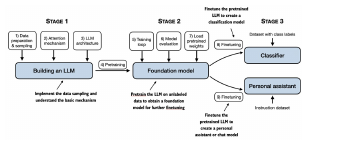

**Fig.9** The stages of building LLMs covered in this book include implementing the LLM architecture and data preparation process, pretraining an LLM to create a foundation model, and finetuning the foundation model to become a personal assistant or text classifier.

First, we will learn about the fundamental data preprocessing steps and code the attention mechanism that is at the heart of every LLM.

Next, in **stage 2**, we will learn how to code and pretrain a GPT-like LLM capable of generating new texts. And we will also go over the fundamentals of evaluating LLMs, which is essential for developing capable NLP systems. Note that pretraining a large LLM from scratch is a significant endeavor, demanding thousands to millions of dollars in computing costs for GPT-like models. Therefore, the focus of stage 2 is on implementing training for educational purposes using a small dataset. In addition, the book will also provide code examples for loading openly available model weights.

Finally, in **stage 3**, we will take a pretrained LLM and finetune it to follow instructions such as answering queries or classifying texts -- the most common tasks in many real-world applications and research. I hope you are looking forward to embarking on this exciting journey!

In [4]:
# --- Conceptual Roadmap for Building an LLM (Based on Chapter 1.7) ---

print("--- Conceptual LLM Building Journey ---")
print("This script outlines the high-level stages of building an LLM as described in the text.")
print("Actual implementation of these stages involves complex deep learning frameworks and vast computational resources.\n")


# Stage 1: Implementing LLM Architecture and Data Preparation
# (Conceptual placeholder for Chapter 2 and beyond)
def stage1_architecture_and_data_prep():
    """
    Conceptual function for Stage 1: Implementing LLM architecture and data preparation.
    In a real scenario, this involves:
    - Designing and coding Transformer blocks (Attention mechanism, Feed-forward networks).
    - Implementing word embeddings and positional encodings.
    - Developing tokenization and text preprocessing pipelines.
    - Handling large text datasets.
    """
    print("\n--- Stage 1: Conceptual Architecture & Data Preparation ---")
    print("  - Learning fundamental data preprocessing steps...")
    print("  - Conceptually coding the 'attention mechanism' (the heart of LLMs)...")
    print("  - Setting up conceptual data pipelines for text input.")
    print("  (This stage lays the groundwork for the neural network structure and data handling.)")

# Stage 2: Pretraining an LLM
# (Conceptual placeholder for later chapters)
def stage2_pretraining_llm(model_size="small", dataset_type="educational"):
    """
    Conceptual function for Stage 2: Pretraining a GPT-like LLM.
    In a real scenario, this involves:
    - Running training loops on large datasets (billions of tokens).
    - Optimizing model parameters using backpropagation.
    - Managing GPU memory and distributed training.
    - Evaluating LLM performance (e.g., perplexity).
    - Potentially loading and reusing openly available model weights.
    """
    print("\n--- Stage 2: Conceptual LLM Pretraining ---")
    print(f"  - Coding and pretraining a GPT-like LLM (conceptual, focusing on {model_size} dataset for {dataset_type}).")
    print("  - This would involve next-word prediction on massive text data.")
    print("  - High computational cost (thousands to millions of dollars) for large models.")
    print("  - Conceptually, we'd also cover LLM evaluation fundamentals here.")
    print("  - (If applicable, conceptually loading pre-existing open-source model weights to skip expensive pretraining).")

# Stage 3: Finetuning the Foundation Model
# (Conceptual placeholder for later chapters, e.g., Chapter 7)
def stage3_finetuning_llm(task_type="personal assistant"):
    """
    Conceptual function for Stage 3: Finetuning the foundation model.
    In a real scenario, this involves:
    - Training on smaller, task-specific labeled datasets.
    - Adapting the pretrained model for specific tasks (e.g., instruction following, classification).
    - Methods like instruction-finetuning (e.g., InstructGPT principles).
    """
    print("\n--- Stage 3: Conceptual LLM Finetuning ---")
    print(f"  - Taking a conceptually 'pretrained' LLM and finetuning it for '{task_type}' tasks.")
    print("  - This involves training on smaller, labeled datasets (e.g., instruction-answer pairs for assistants).")
    print("  - Examples: Answering queries, text classification, summarization, etc.")
    print("  (This stage makes the LLM useful for specific real-world applications.)")

# --- Simulate the Journey ---
print("Embarking on the exciting journey of building an LLM (conceptually)...")

stage1_architecture_and_data_prep()
stage2_pretraining_llm()
stage3_finetuning_llm()

print("\n--- Conceptual LLM Building Journey Complete ---")
print("Remember: These are conceptual representations. Actual implementation requires extensive")
print("deep learning knowledge and frameworks like PyTorch or TensorFlow.")

--- Conceptual LLM Building Journey ---
This script outlines the high-level stages of building an LLM as described in the text.
Actual implementation of these stages involves complex deep learning frameworks and vast computational resources.

Embarking on the exciting journey of building an LLM (conceptually)...

--- Stage 1: Conceptual Architecture & Data Preparation ---
  - Learning fundamental data preprocessing steps...
  - Conceptually coding the 'attention mechanism' (the heart of LLMs)...
  - Setting up conceptual data pipelines for text input.
  (This stage lays the groundwork for the neural network structure and data handling.)

--- Stage 2: Conceptual LLM Pretraining ---
  - Coding and pretraining a GPT-like LLM (conceptual, focusing on small dataset for educational).
  - This would involve next-word prediction on massive text data.
  - High computational cost (thousands to millions of dollars) for large models.
  - Conceptually, we'd also cover LLM evaluation fundamentals he

In [5]:
import random

# --- Conceptual Building Blocks of a GPT-like Transformer Decoder ---
# This code is purely illustrative and does not perform any actual deep learning computations.
# It represents the *idea* of components, not their functional implementation.

class ConceptualSelfAttention:
    def __init__(self, head_id):
        self.head_id = head_id
        # In a real model, this would contain query, key, value weight matrices.
        # Here, it's just a placeholder.
        print(f"    ConceptualSelfAttention Head {self.head_id} initialized.")

    def conceptual_forward(self, input_sequence_representation):
        """
        Conceptually processes an input sequence.
        In reality, this involves dot products, scaling, softmax, and weighted sums.
        """
        # print(f"      Head {self.head_id}: Conceptually applying attention to '{input_sequence_representation}'")
        return f"Attended_output_head_{self.head_id}({input_sequence_representation})"

class ConceptualMultiHeadAttention:
    def __init__(self, num_heads):
        self.num_heads = num_heads
        self.heads = [ConceptualSelfAttention(i + 1) for i in range(num_heads)]
        print(f"    ConceptualMultiHeadAttention with {num_heads} heads initialized.")

    def conceptual_forward(self, input_sequence_representation):
        """
        Conceptually combines outputs from multiple attention heads.
        In reality, this involves concatenating head outputs and a linear projection.
        """
        head_outputs = [head.conceptual_forward(input_sequence_representation) for head in self.heads]
        combined_output = f"Combined_output_from_{len(head_outputs)}_heads({', '.join(head_outputs)})"
        return combined_output

class ConceptualFeedForward:
    def __init__(self):
        # In a real model, this contains two linear layers with an activation function.
        print("    ConceptualFeedForward Network initialized.")

    def conceptual_forward(self, input_representation):
        """
        Conceptually applies a feed-forward transformation.
        """
        return f"FFN_output({input_representation})"

class ConceptualTransformerDecoderLayer:
    def __init__(self, layer_id, num_attention_heads):
        self.layer_id = layer_id
        self.self_attention = ConceptualMultiHeadAttention(num_attention_heads)
        self.feed_forward = ConceptualFeedForward()
        # In reality, includes LayerNorm and Residual Connections.
        print(f"  ConceptualTransformerDecoderLayer {self.layer_id} initialized.")

    def conceptual_forward(self, input_representation_from_prev_layer):
        """
        Conceptually processes an input through self-attention and feed-forward.
        """
        attention_output = self.self_attention.conceptual_forward(input_representation_from_prev_layer)
        ffn_output = self.feed_forward.conceptual_forward(attention_output)
        return ffn_output # This would be added to input_representation_from_prev_layer for residual connection

class ConceptualGPTModelStructure:
    def __init__(self, num_decoder_layers, num_attention_heads_per_layer, vocab_size=50000, max_seq_len=1024):
        self.num_decoder_layers = num_decoder_layers
        self.num_attention_heads = num_attention_heads_per_layer
        self.vocab_size = vocab_size
        self.max_seq_len = max_seq_len

        # Conceptual Embedding Layer
        print("Conceptual Embedding Layer (Word Embeddings & Positional Encodings) initialized.")

        # Conceptual Decoder Layers
        self.decoder_layers = [
            ConceptualTransformerDecoderLayer(i + 1, self.num_attention_heads)
            for i in range(self.num_decoder_layers)
        ]

        # Conceptual Output Head (for next word prediction)
        print("Conceptual Output Head (for next word prediction) initialized.")
        print(f"\nConceptual GPT-like Model Structure initialized with {self.num_decoder_layers} decoder layers.")
        print(f"  (Conceptually, a model like GPT-3 would have 96 layers and billions of parameters.)")


    def conceptual_predict_next_token(self, input_text_tokens):
        """
        A highly simplified, conceptual function that simulates next-word prediction.
        It does not perform actual inference or use learned weights.
        """
        if not input_text_tokens:
            return random.choice(["The", "A", "Hello", "It"]) # Start of sentence
        
        last_token = input_text_tokens[-1].lower()
        
        # Simulate simple transitions (very, very basic autoregression)
        if last_token == "hello":
            return "world"
        elif last_token == "world":
            return "!"
        elif last_token == "the":
            return random.choice(["cat", "dog", "sun", "sky"])
        elif last_token == "is":
            return random.choice(["a", "great", "not"])
        elif last_token == "a":
            return random.choice(["good", "bad", "nice", "new"])
        else:
            return random.choice(["...", "end", "and", "then"]) # Fallback

    def conceptual_generate_text(self, prompt, num_tokens_to_generate=10):
        """
        Simulates text generation using the conceptual next-token prediction.
        """
        current_tokens = prompt.lower().split()
        generated_sequence = list(current_tokens)

        print(f"\n--- Conceptual GPT Text Generation Simulation ---")
        print(f"Prompt: '{prompt}'")
        
        for _ in range(num_tokens_to_generate):
            next_token = self.conceptual_predict_next_token(current_tokens)
            if next_token == "...": # Simple stop condition
                break
            generated_sequence.append(next_token)
            current_tokens.append(next_token) # For autoregression
            print(f"  Generated: {' '.join(generated_sequence)}")
        
        return ' '.join(generated_sequence)


# --- Demonstrate Conceptual GPT Model Structure ---
print("--- Building Conceptual GPT Model Structure ---")
# Example: A conceptual model resembling GPT-2 in layers, not parameters/complexity
conceptual_gpt_model = ConceptualGPTModelStructure(
    num_decoder_layers=12,  # GPT-2 had 12 layers
    num_attention_heads_per_layer=12 # GPT-2 had 12 heads
)

# --- Demonstrate Conceptual GPT Text Generation ---
print("\n--- Running Conceptual GPT Text Generation ---")
generated_output = conceptual_gpt_model.conceptual_generate_text("Hello", num_tokens_to_generate=5)
print(f"\nFinal conceptual generated text: '{generated_output}'")

generated_output_2 = conceptual_gpt_model.conceptual_generate_text("The sky is", num_tokens_to_generate=7)
print(f"\nFinal conceptual generated text: '{generated_output_2}'")

print("\n--- End of Conceptual GPT Model Code ---")
print("This code conceptually illustrates the high-level components and text generation process of a GPT-like model.")
print("It does NOT perform actual deep learning computations or reflect the immense complexity of a real GPT-3 model.")

--- Building Conceptual GPT Model Structure ---
Conceptual Embedding Layer (Word Embeddings & Positional Encodings) initialized.
    ConceptualSelfAttention Head 1 initialized.
    ConceptualSelfAttention Head 2 initialized.
    ConceptualSelfAttention Head 3 initialized.
    ConceptualSelfAttention Head 4 initialized.
    ConceptualSelfAttention Head 5 initialized.
    ConceptualSelfAttention Head 6 initialized.
    ConceptualSelfAttention Head 7 initialized.
    ConceptualSelfAttention Head 8 initialized.
    ConceptualSelfAttention Head 9 initialized.
    ConceptualSelfAttention Head 10 initialized.
    ConceptualSelfAttention Head 11 initialized.
    ConceptualSelfAttention Head 12 initialized.
    ConceptualMultiHeadAttention with 12 heads initialized.
    ConceptualFeedForward Network initialized.
  ConceptualTransformerDecoderLayer 1 initialized.
    ConceptualSelfAttention Head 1 initialized.
    ConceptualSelfAttention Head 2 initialized.
    ConceptualSelfAttention Head 3 ini